In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the CSV files into DataFrames
df = pd.read_csv('anxiety-disorders-prevalence-vs-gdp.csv')
source2_df = pd.read_csv('bipolar-disorder-prevalence.csv')
source3_df = pd.read_csv('eating-disorders-prevalence.csv')
source4_df = pd.read_csv('schizophrenia-prevalence.csv')
df_cleaned = df.dropna(subset=['GDP per capita, PPP (constant 2017 international $)', 'Anxiety disorders', 'Population (historical estimates)'], how='any')

# Save the filtered data to cleaned_anxiety_GDP_data.csv
df_cleaned.to_csv('cleaned_anxiety_GDP_data.csv', index=False)

# Filter the DataFrame for data where GDP is over 30000 and year is 2019
high_income_countries = df_cleaned[(df_cleaned['GDP per capita, PPP (constant 2017 international $)'] > 30000) & (df_cleaned['Year'] == 2019)]

# Save the filtered data to high_income_countries.csv
high_income_countries.to_csv('high_income_countries.csv', index=False)

# Merge the DataFrames based on both 'country' and 'year' columns
merged_df = pd.merge(high_income_countries, source2_df, on=['Entity', 'Year'], how='inner')
merged1_df = pd.merge(merged_df, source3_df, on=['Entity', 'Year'], how='inner')
merged2_df = pd.merge(merged1_df, source4_df, on=['Entity', 'Year'], how='inner')

# Add a new column for the sum of the mental disorder rates
merged2_df['total_mental_disorders'] = (merged2_df['Anxiety disorders'] +
                                    merged2_df['Bipolar disorders '] +
                                    merged2_df['Eating disorders '] +
                                    merged2_df['Schizophrenia disorders '])

# Save the updated DataFrame to Mental_health_data.csv
merged2_df.to_csv('Mental_health_data.csv', index=False)

C:\Users\Niloo\AppData\Local\Temp\ipykernel_36384\1424457579.py:26: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged2_df = pd.merge(merged1_df, source4_df, on=['Entity', 'Year'], how='inner')


Correlation matrix:
                                                    GDP per capita, PPP (constant 2017 international $)  \
GDP per capita, PPP (constant 2017 internationa...                                           1.000000     
Anxiety disorders                                                                            0.192507     
Bipolar disorders                                                                            0.133604     
Eating disorders                                                                             0.381039     
Schizophrenia disorders                                                                      0.153767     

                                                    Anxiety disorders  \
GDP per capita, PPP (constant 2017 internationa...           0.192507   
Anxiety disorders                                            1.000000   
Bipolar disorders                                            0.543568   
Eating disorders                             

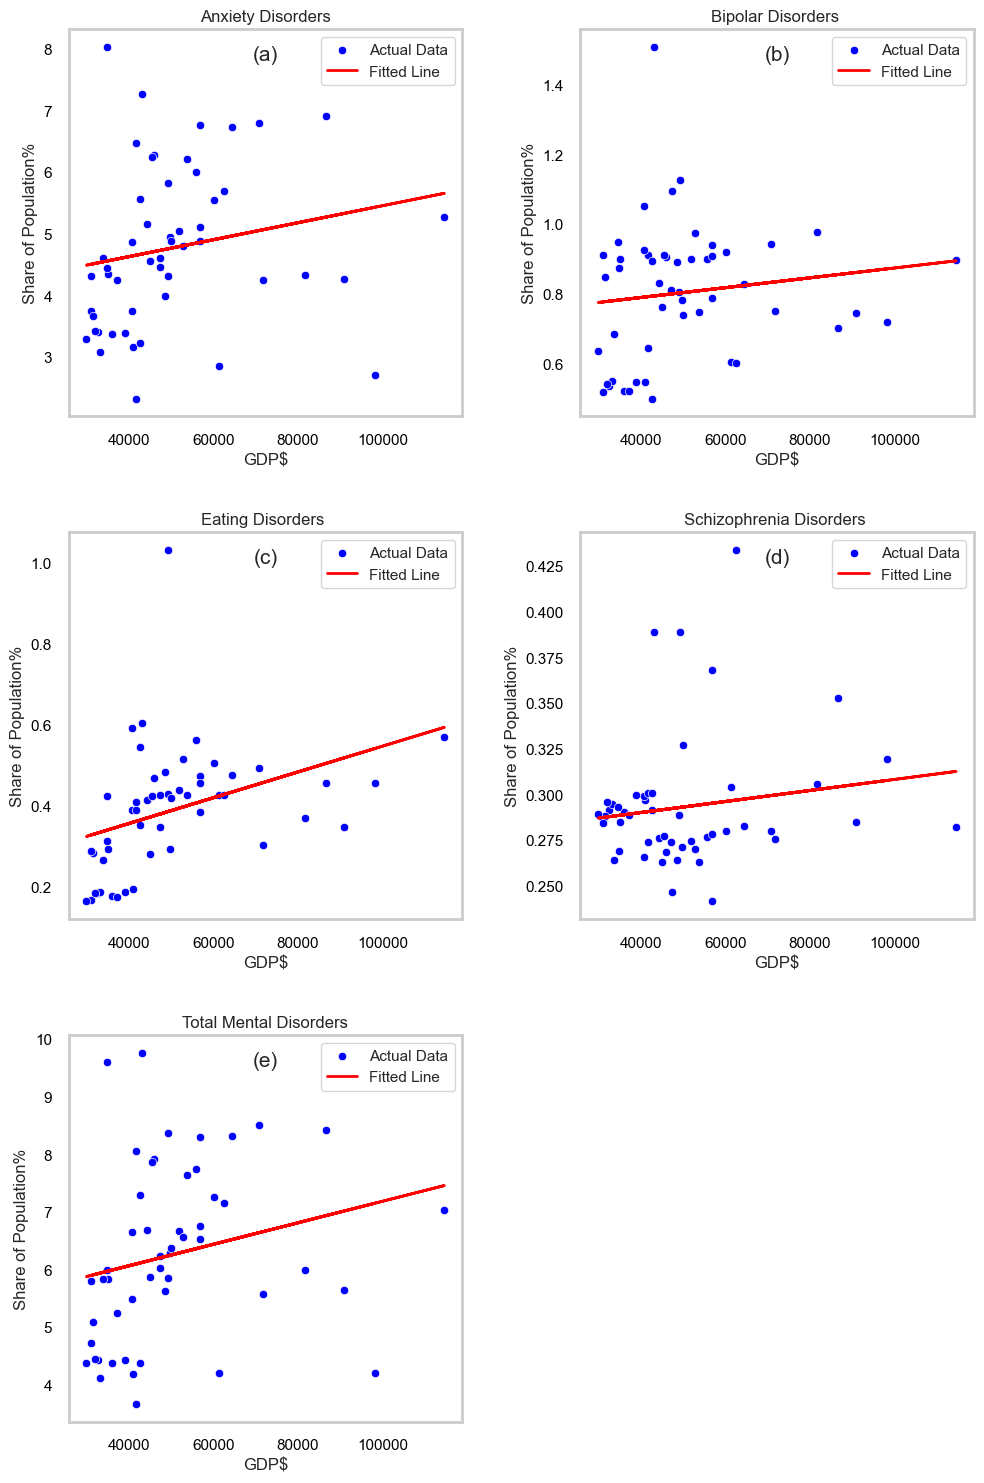

In [18]:
# Calculate the correlation coefficients
correlation_matrix = merged2_df[['GDP per capita, PPP (constant 2017 international $)', 'Anxiety disorders', 'Bipolar disorders ', 'Eating disorders ', 'Schizophrenia disorders ']].corr()

# Print the correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

# Set the plot style
sns.set(style="whitegrid")

# List of mental health disorder
disorders = ['Anxiety disorders', 'Bipolar disorders ', 'Eating disorders ', 'Schizophrenia disorders ','total_mental_disorders' ]

# Create a file to save model summaries
with open('model_summaries.txt', 'w') as f:
    f.write('Linear Regression Model Summaries\n')
    f.write('=' * 40 + '\n\n')
    

# Function to perform linear regression and plot results using statsmodels
def perform_linear_regression(df, x_col, y_col, i):
    # Prepare the data
    X = df[x_col]
    y = df[y_col]
    
    # Add a constant to the independent variable
    X = sm.add_constant(X)
    
    # Create the OLS model
    model = sm.OLS(y, X).fit()
    
    # Get the model's predictions
    predictions = model.predict(X)
    
    # Print the model summary
    print(model.summary())
    with open('model_summaries.txt', 'a') as f:
        f.write(f'{y_col.replace("_", " ").title()} vs GDP\n')
        f.write(str(model.summary()))
        f.write('\n' + '=' * 40 + '\n\n')
    
    # Plot outputs
    sns.scatterplot(x=df[x_col], y=df[y_col], ax=axs[i], color='blue', label='Actual Data')
    axs[i].plot(df[x_col], predictions, color='red', linewidth=2, label='Fitted Line')
    axs[i].set_title(f'{y_col.replace("_", " ").title()}')
    axs[i].set_xlabel('GDP$')
    axs[i].set_ylabel('Share of Population%')
    axs[i].legend()
    axs[i].grid(False)
    # Increase the thickness of the tick lines
    axs[i].tick_params(axis='both', which='major', direction='in', width=3)  
    # Increase the distance between tick labels and axis
    axs[i].tick_params(axis='both', which='major', pad=12)
    # Change the color of the axis tick lines to black
    axs[i].tick_params(axis='both', colors='black')
    # Add caption
    axs[i].text(0.5, 0.92, captions[i], transform=axs[i].transAxes, fontsize=15, ha='center')
    # Increase the thickness of the axis tick lines
    axs[i].spines['top'].set_linewidth(2)  
    axs[i].spines['right'].set_linewidth(2)  
    axs[i].spines['bottom'].set_linewidth(2)  
    axs[i].spines['left'].set_linewidth(2) 

# Create a figure with specified GridSpec layout
fig = plt.figure(figsize=(10, 15))
gs = fig.add_gridspec(3, 2)
axs = [None] * 5

# Create subplots
axs[0] = fig.add_subplot(gs[0, 0])  # First row, first column
axs[1] = fig.add_subplot(gs[0, 1])  # First row, second column
axs[2] = fig.add_subplot(gs[1, 0])  # Second row, first column
axs[3] = fig.add_subplot(gs[1, 1])  # Second row, second column
axs[4] = fig.add_subplot(gs[2, 0])  # Third row, spanning both columns

captions = ['(a)', '(b)', '(c)', '(d)', '(e)']

# Perform linear regression and plot for each disorder
for i, disorder in enumerate(disorders):
    perform_linear_regression(merged2_df, 'GDP per capita, PPP (constant 2017 international $)', disorder, i)
    
# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig('Prevalence_mental_disorder_GDP')
plt.show()